In [10]:
from google.colab import files
uploaded = files.upload()

Saving animal_data_real.zip to animal_data_real.zip


In [11]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = "animal_data_new.zip"
extract_path = "animal_data_new"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check the contents of the extracted directory
print(os.listdir(extract_path))

['animal_data']


In [12]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

# Dataset parameters
DATASET_DIR = "animal_data_new"
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 20

# Preprocessing and Data Augmentation with validation split
data_gen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,  # 20% of data for validation
    rotation_range=20,  # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

# Train and validation data generators
train_data = data_gen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training",
)

validation_data = data_gen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation",
)

# Get the number of classes
num_classes = len(train_data.class_indices)
print(f"Number of classes: {num_classes}")

# Load pre-trained ResNet50 model without the top layer (for transfer learning)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the base model to prevent retraining its weights
base_model.trainable = False

# Define the model architecture
model = models.Sequential([
    base_model,  # Add the pre-trained ResNet50 model
    layers.GlobalAveragePooling2D(),  # Global average pooling to reduce the dimensionality
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Show model summary to confirm the architecture
model.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=validation_data,
    callbacks=[early_stopping],
)


Found 1556 images belonging to 1 classes.
Found 388 images belonging to 1 classes.
Number of classes: 1


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 5, 5, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 190s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 181s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 179s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 184s 4s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


In [13]:
# Evaluate the model
eval_loss, eval_accuracy = model.evaluate(validation_data)
print(f"Validation Loss: {eval_loss:.4f}")
print(f"Validation Accuracy: {eval_accuracy:.4f}")


13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00
Validation Loss: 0.0000
Validation Accuracy: 1.0000


13/13 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 1.0000 - loss: 0.0000e+00


Validation Accuracy: 1.00
Model saved as animal_classification_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


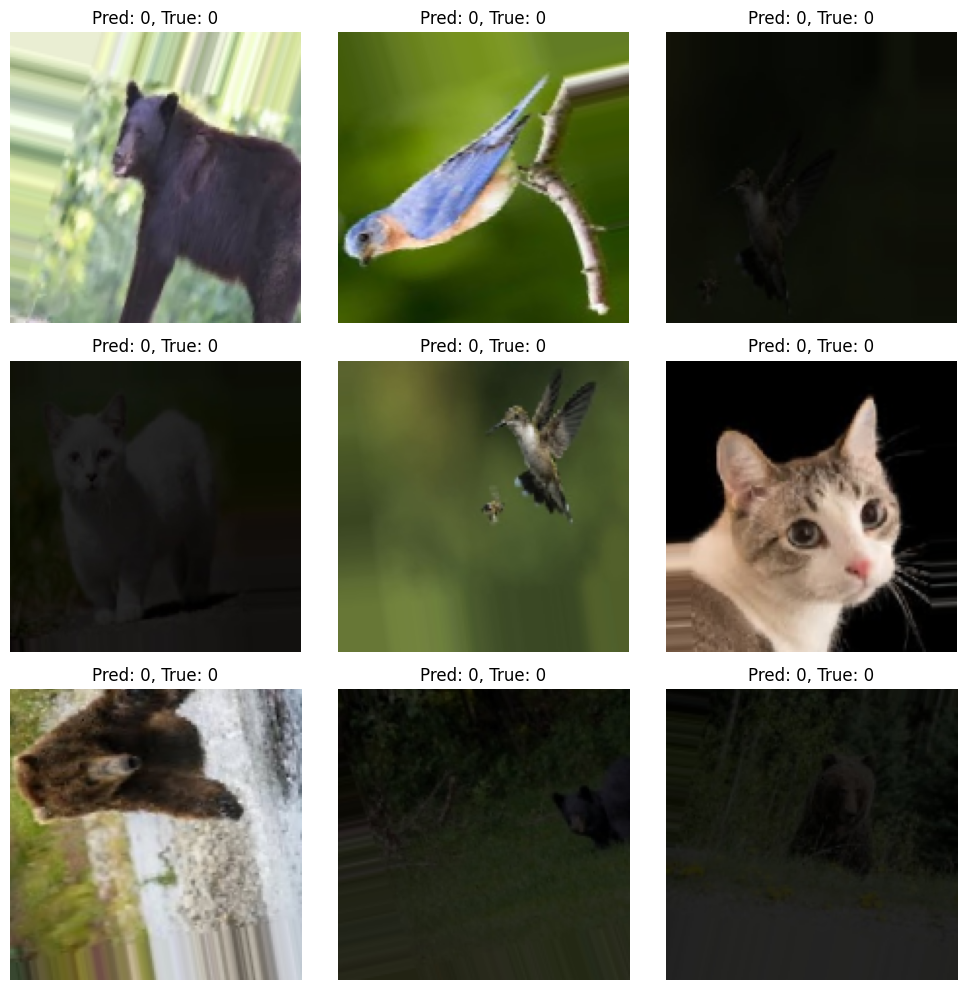

In [14]:
# Evaluate the Model
eval_loss, eval_accuracy = model.evaluate(validation_data)
print(f"Validation Accuracy: {eval_accuracy:.2f}")

# Save the Model
model.save("animal_classification_model.h5")
print("Model saved as animal_classification_model.h5")

# Predict on Validation Data
import numpy as np
from matplotlib import pyplot as plt

# Get a batch of validation data
validation_batch = next(iter(validation_data))
images, labels = validation_batch

predictions = model.predict(images)

# Display predictions
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(labels[i])
    plt.title(f"Pred: {pred_label}, True: {true_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

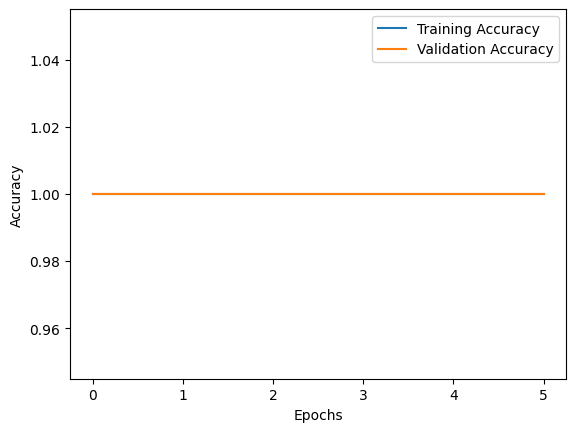

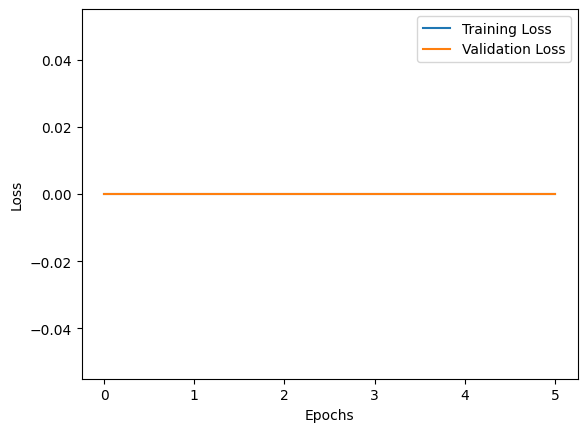

In [15]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
